### Student Information
Name: 謝宗燁

Student ID: 110033636

GitHub ID: Ericxie19990302

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# First Part : do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook.

In [103]:
### Begin Assignment Here
# Data preparation
%load_ext autoreload
%autoreload 2

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

import pandas as pd

import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [104]:
# This is a teqnique different from : .loc and .iloc
X.text[:10]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [105]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [106]:
# Answer here
# From the definition of the pandas.isnull() function : This function takes a scalar or array-like object 
# and indicates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).
# The reason why the isnull() function seems to be not working will be explained for each row of data
# row 0 : np.nan will be transform to "NaN in numeric arrays" => is null
# row 1 : Since the value is missing, the value will be Nan in numeric arrays => is null
# row 2 : The data is a string 'NaN', not the same as NaN in numerical arrays => is not null
# row 3 : The data is a string 'None', not the same as None in object arrays => is not null
# row 4 : The data is None value, it will be transform to None in object arrays => is null
# row 5 : The data is a empty string, not the same as missing value => is not null

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [107]:
print(X[10:20])
X_sample = X.sample(n=1000)
print(X[10:20])

                                                 text  category  \
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13  Subject: So what is Maddi? From: madhaus@netco...         0   
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
17  Organization: Penn State University From: <JSN...         0   
18  From: tom_milligan@rainbow.mentorg.com Subject...         3   
19  Subject: Re: Don't more innocents die without ...         0   

             category_name  
10  soc.religion.christian  
11           comp.graphics  
12             alt.atheism  
13             alt.atheism  
14           comp.graphics  
15           comp.graphics  
16                 sci.med  
17             alt.atheism  
1

In [108]:
# Answer here
# The X value doesn't seem to change

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

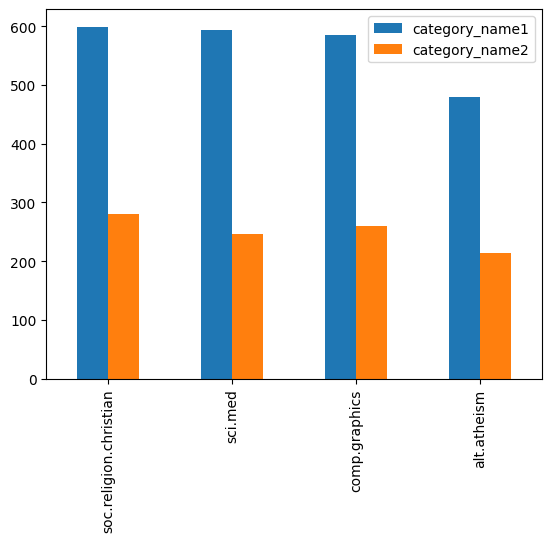

In [110]:
df_test = pd.DataFrame({'category_name1': X.category_name.value_counts(), 'category_name2': X_sample.category_name.value_counts()}, index=X.category_name.value_counts().index)

ax = df_test.plot.bar()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix


In [112]:
# Answer here
index_ = 0
for index, i in enumerate(X_counts[4,1:].toarray().squeeze()):
    if i == 1:
        index_ = index
        break
print(count_vect.get_feature_names_out()[index_])
# The code above prints the answer

00pm


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

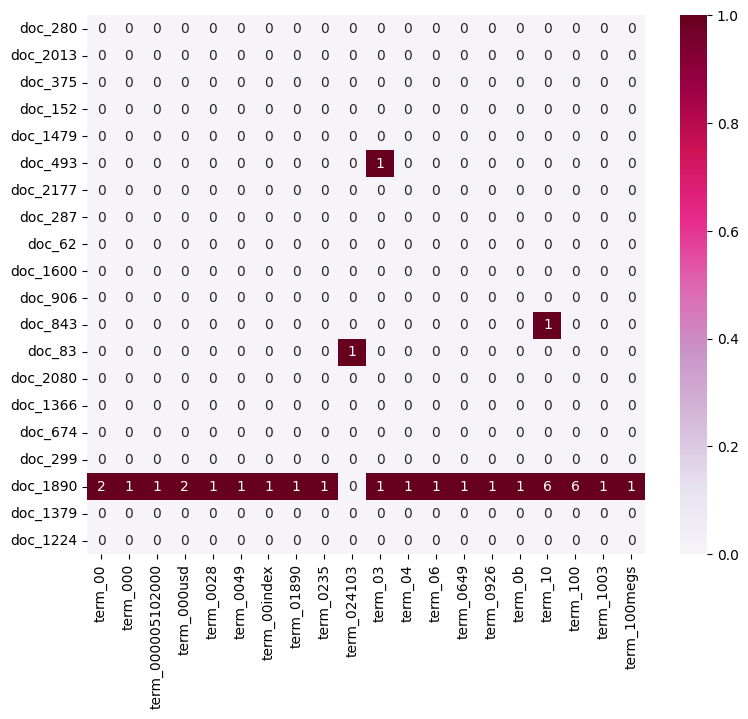

In [113]:
# Answer here
import seaborn as sns
# Resample the data
X_sample_new = X.sample(n=20)
count_vect_sample = CountVectorizer()
X_counts_sample = count_vect_sample.fit_transform(X_sample_new.text)


plot_x = ["term_"+str(i) for i in count_vect_sample.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X_sample_new.index)[0:20]]
plot_z = X_counts_sample[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

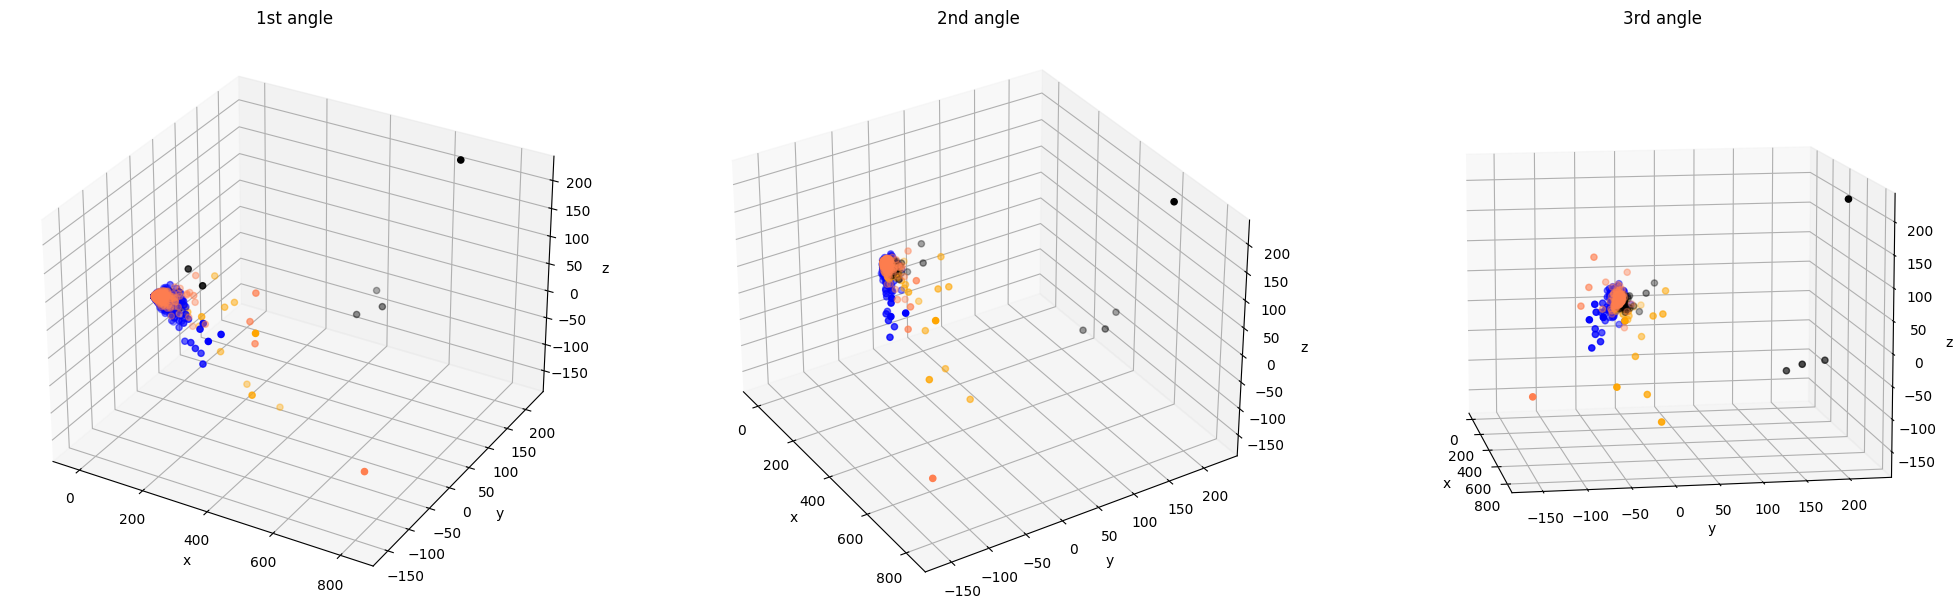

In [114]:
from sklearn.decomposition import PCA
X_reduced_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

fig = plt.figure(figsize = (25,10))

ax = fig.add_subplot(1,3,1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('1st angle')

ax2 = fig.add_subplot(1,3,2, projection='3d')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(32,-32)
ax2.set_title('2nd angle')

ax3 = fig.add_subplot(1,3,3, projection='3d')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.view_init(10,-10)
ax3.set_title('3rd angle')

col = ['coral', 'blue', 'black', 'orange']

for c, category in zip(col, categories):
    xs = X_reduced_3[X['category_name'] == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c)
    ax2.scatter(xs, ys, zs, c=c)
    ax3.scatter(xs, ys, zs, c=c)
    
plt.show()
# Some findings
# Orange data is concentrated with only one obvious outliers
# Blue data is very concentrated


### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [115]:
# Compute term frequency
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [116]:
# Answer here
import plotly.express as px

df_test = pd.DataFrame({"text":count_vect.get_feature_names_out()[:300],"freq":term_frequencies[:300]})

fig = px.bar(df_test,x='text'  ,y="freq")
fig.update_layout(xaxis_type='category')
fig.show()

# Some code inspired by link : https://community.plotly.com/t/plotly-express-with-xaxis-having-integers-strings/34777

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [117]:
# Answer here
import plotly.express as px

# Simply reducd the number of terms by indexing
df_test = pd.DataFrame({"text":count_vect.get_feature_names_out()[:100],"freq":term_frequencies[:100]})

fig = px.bar(df_test,x='text'  ,y="freq")
fig.update_layout(xaxis_type='category')
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [118]:
# Answer here
# First sort value by label, then reverse the dataframe
df_sorted = df_test.sort_values(by='freq').iloc[::-1]
fig = px.bar(df_sorted,x='text'  ,y="freq")
fig.update_layout(xaxis_type='category')
fig.show()


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [119]:
# Preparation code for exercise 16
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()


In [120]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]
# Yes it worked!!

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category bin_category_name  
0           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]

# Second Part : follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though)

## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Atrribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Conclusion
8. References

In [121]:
%reset -f

## 1. Data Source
    - The data source is from [link](https://github.com/keziatamus/DM2022-Lab1-Master)
    - The data is downloaded and located in "sentiment labelled sentences data" folder

## 2. Data Preparation

In [122]:
import pandas as pd
data = pd.read_csv('sentiment labelled sentences data/amazon_cells_labelled.txt', sep="\t", header=None)
data.columns = ["text","score"]
data

text  score
0    So there is no way for me to plug it in here i...      0
1                          Good case, Excellent value.      1
2                               Great for the jawbone.      1
3    Tied to charger for conversations lasting more...      0
4                                    The mic is great.      1
..                                                 ...    ...
995  The screen does get smudged easily because it ...      0
996  What a piece of junk.. I lose more calls on th...      0
997                       Item Does Not Match Picture.      0
998  The only thing that disappoint me is the infra...      0
999  You can not answer calls with the unit, never ...      0

[1000 rows x 2 columns]

## 3. Data Transform

### 3.1 Converting Dictionary to Pandas Dataframe
    - The data is already in Pandas dataframe when loaded

### 3.2 Familiarizing yourself with the Data

In [123]:
data[:10][['text','score']]

text  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1
5  I have to jiggle the plug to get it to line up...      0
6  If you have several dozen or several hundred c...      0
7        If you are Razr owner...you must have this!      1
8                Needless to say, I wasted my money.      0
9                   What a waste of money and time!.      0

## 4. Data Mining using Pandas

### 4.1 Dealing with Missing Values

In [124]:
# Check Missing values
data.isnull()

text  score
0    False  False
1    False  False
2    False  False
3    False  False
4    False  False
..     ...    ...
995  False  False
996  False  False
997  False  False
998  False  False
999  False  False

[1000 rows x 2 columns]

In [125]:
import helpers.data_mining_helpers as dmh
data.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

### 4.2 Dealing with Duplicate Data

In [126]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [127]:
sum(data.duplicated())
# Found duplicated data

10

In [128]:
# Deal with duplicated data
data.drop_duplicates(keep=False, inplace=True)
data.duplicated().sum()
# After cleaning duplicated data, the duplicated data number = 0

0

## 5. Data Preprocessing

### 5.1 Sampling

In [129]:
data_sample = data.sample(n=100)
len(data_sample)

100

Score distribution plot for all data!

0    494
1    486
Name: score, dtype: int64


<AxesSubplot: title={'center': 'Score distribution'}>

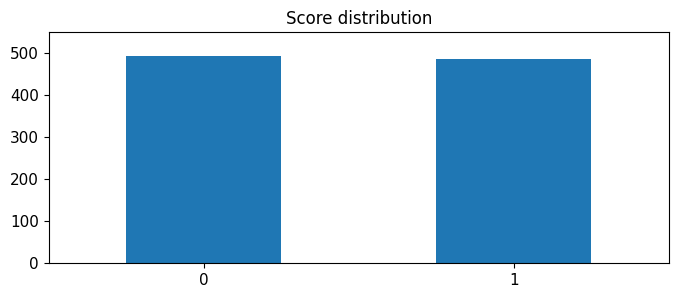

In [130]:
print(data.score.value_counts())
data.score.value_counts().plot(kind='bar', title='Score distribution', ylim=[0,550], rot=0, fontsize=11, figsize=(8,3))

Score distribution plot for sampled data!

1    54
0    46
Name: score, dtype: int64


<AxesSubplot: title={'center': 'Sampled Score distribution'}>

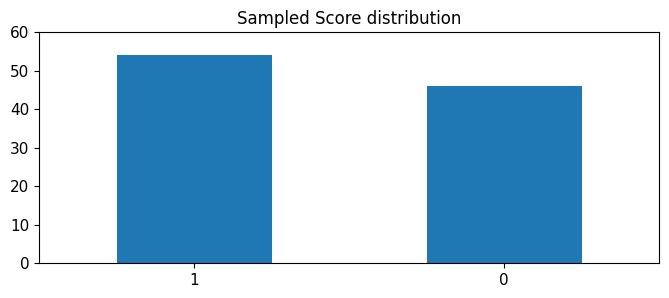

In [131]:
print(data_sample.score.value_counts())
data_sample.score.value_counts().plot(kind='bar', title='Sampled Score distribution', ylim=[0,60], rot=0, fontsize=11, figsize=(8,3))

Plot all data score distribution & sampled data score distribution in one plot

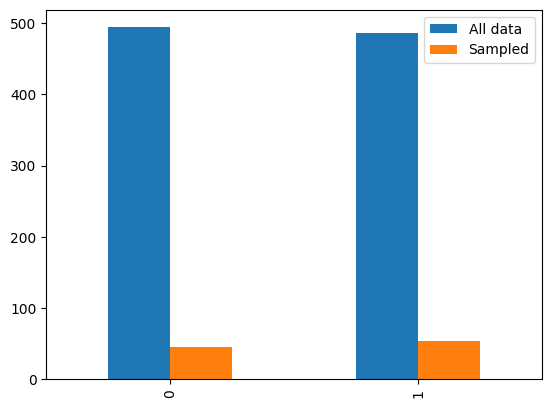

In [132]:

df_test = pd.DataFrame({'All data': data.score.value_counts(), 'Sampled': data_sample.score.value_counts()}, index=data.score.value_counts().index)

ax = df_test.plot.bar()

### 5.2 Feature Creation

In [133]:
import nltk
nltk.download('punkt')
data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))
data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NTHUEECL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


text  score  \
0    So there is no way for me to plug it in here i...      0   
1                          Good case, Excellent value.      1   
2                               Great for the jawbone.      1   
3    Tied to charger for conversations lasting more...      0   
4                                    The mic is great.      1   
..                                                 ...    ...   
995  The screen does get smudged easily because it ...      0   
996  What a piece of junk.. I lose more calls on th...      0   
997                       Item Does Not Match Picture.      0   
998  The only thing that disappoint me is the infra...      0   
999  You can not answer calls with the unit, never ...      0   

                                              unigrams  
0    [So, there, is, no, way, for, me, to, plug, it...  
1                 [Good, case, ,, Excellent, value, .]  
2                        [Great, for, the, jawbone, .]  
3    [Tied, to, charger, for, conversations, lastin...  
4                             [The, mic, is, great, .]  
..                                                 ...  
995  [The, screen, does, get, smudged, easily, beca...  
996  [What, a, piece, of, junk, .., I, lose, more, ...  
997               [Item, Does, Not, Match, Picture, .]  
998  [The, only, thing, that, disappoint, me, is, t...  
999  [You, can, not, answer, calls, with, the, unit...  

[980 rows x 3 columns]

### 5.3 Feature subset selection

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text) #learn the vocabulary and return document-term matrix
print('shape of data counting matrix: \n',data_counts.shape)
print('First 10 feature name of data counting matix: \n',count_vect.get_feature_names_out()[0:10])

shape of data counting matrix: 
 (980, 1845)
First 10 feature name of data counting matix: 
 ['10' '100' '11' '12' '13' '15' '15g' '18' '20' '2000']


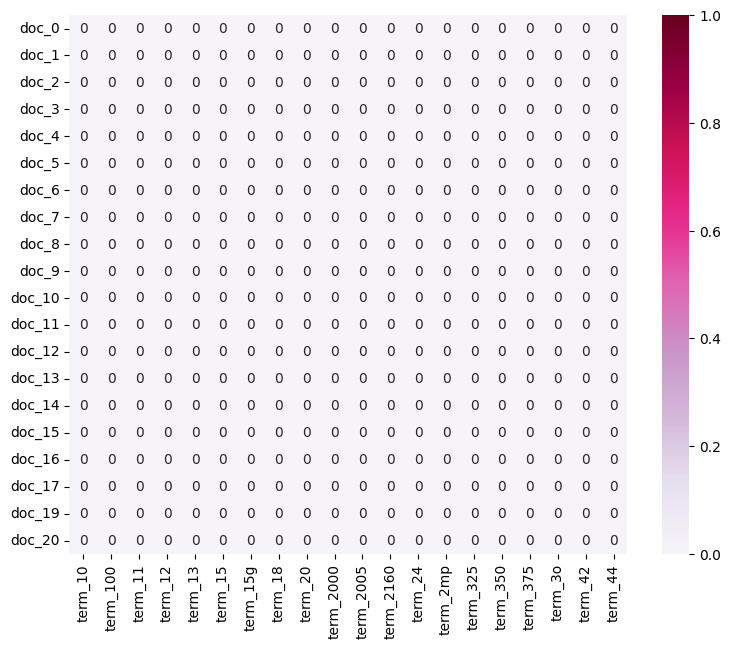

In [135]:

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
plot_z = data_counts[0:20, 0:20].toarray()

import seaborn as sns
import matplotlib.pyplot as plt

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

PCA algorithm

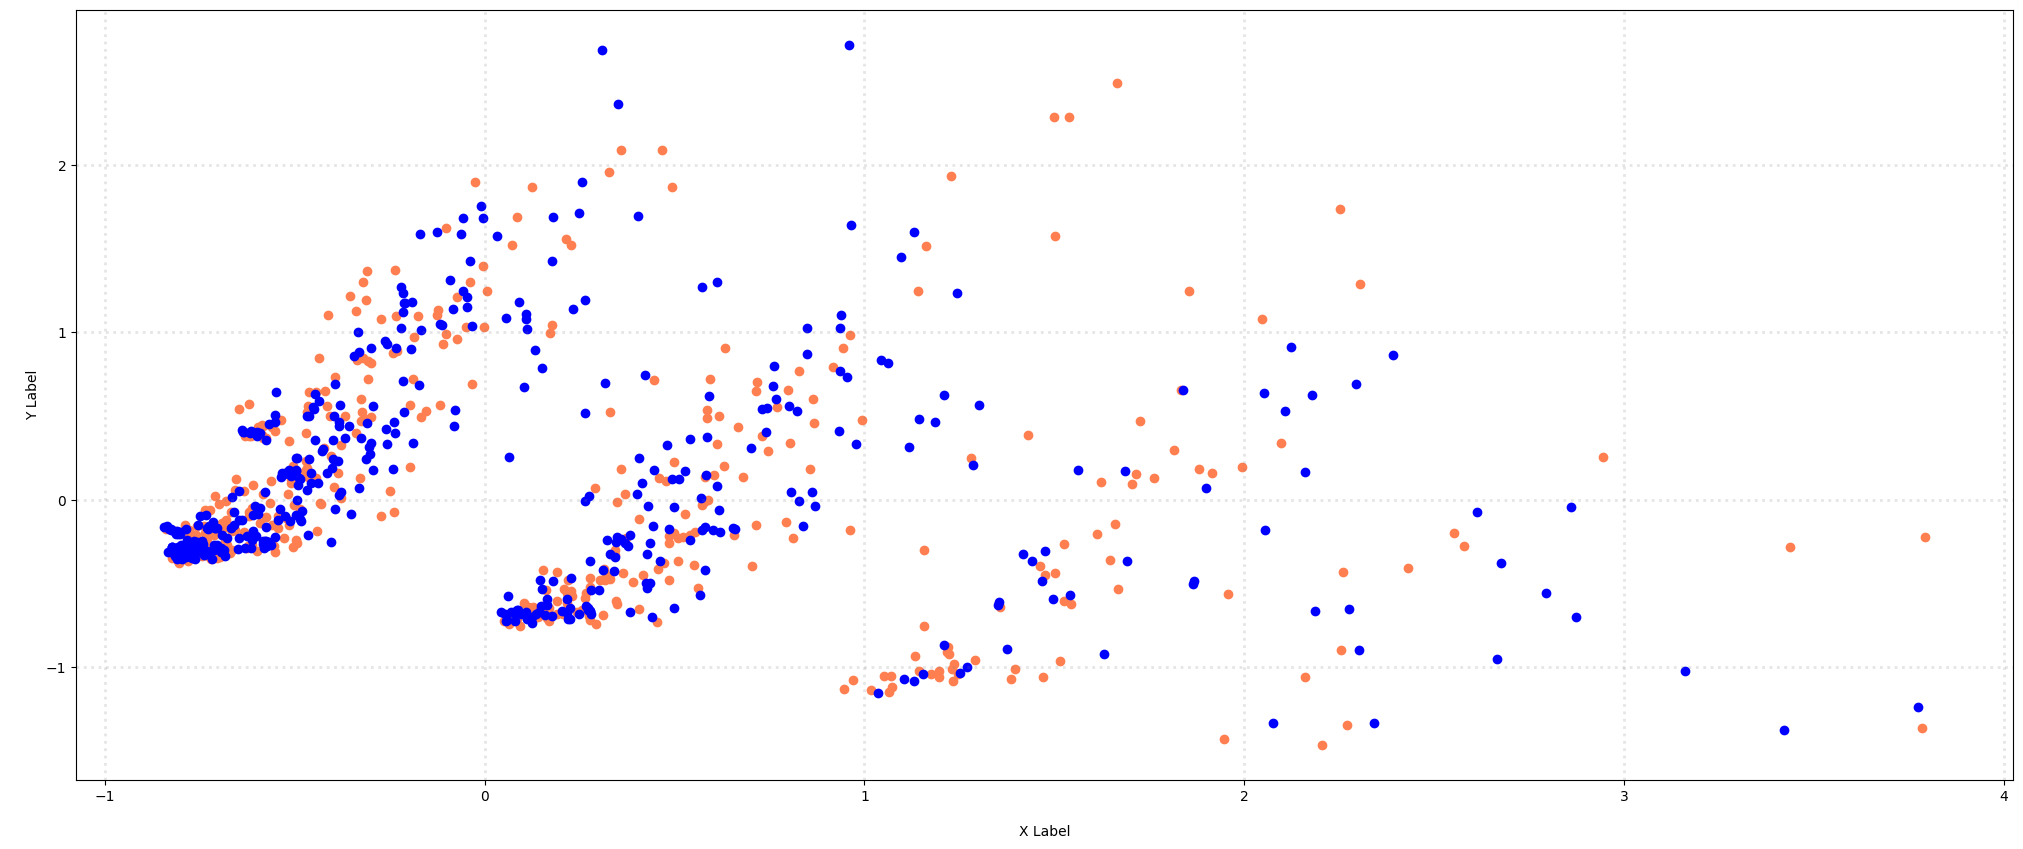

In [136]:
from sklearn.decomposition import PCA
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

scores = [0,1]

for c, score in zip(col, scores):
    xs = data_reduced[data['score'] == score].T[0]
    ys = data_reduced[data['score'] == score].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 5.5 Attribute Transformation / Aggregation

In [137]:
import numpy as np
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

Plot bar plot for frequency

[]

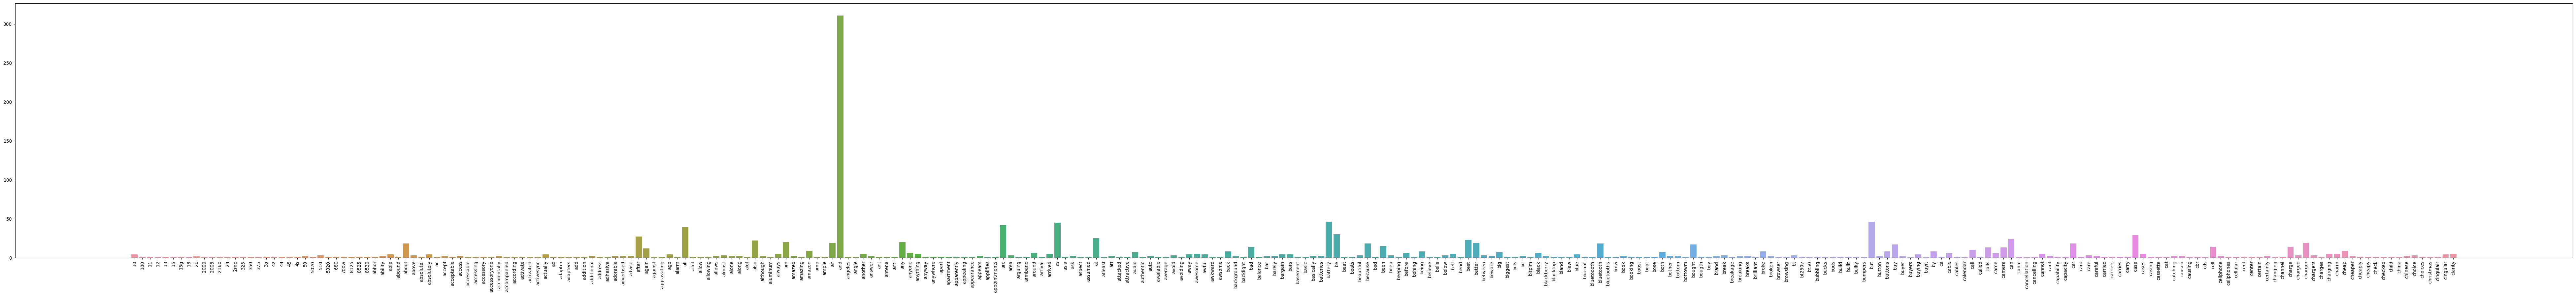

In [138]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

Plot bar plot for frequency as log scale

[]

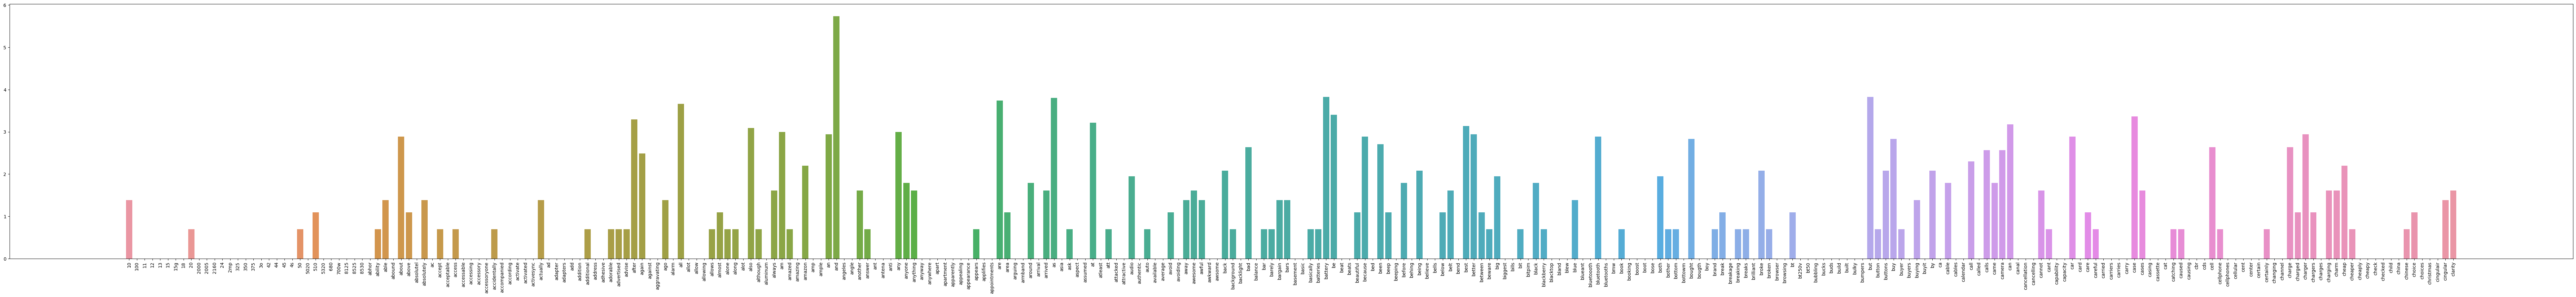

In [139]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### 5.6 Discretization and Binarization

In [140]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.score)
data['bin_score'] = mlb.transform(data['score']).tolist()
data

text  score  \
0    So there is no way for me to plug it in here i...      0   
1                          Good case, Excellent value.      1   
2                               Great for the jawbone.      1   
3    Tied to charger for conversations lasting more...      0   
4                                    The mic is great.      1   
..                                                 ...    ...   
995  The screen does get smudged easily because it ...      0   
996  What a piece of junk.. I lose more calls on th...      0   
997                       Item Does Not Match Picture.      0   
998  The only thing that disappoint me is the infra...      0   
999  You can not answer calls with the unit, never ...      0   

                                              unigrams bin_score  
0    [So, there, is, no, way, for, me, to, plug, it...       [0]  
1                 [Good, case, ,, Excellent, value, .]       [1]  
2                        [Great, for, the, jawbone, .]       [1]  
3    [Tied, to, charger, for, conversations, lastin...       [0]  
4                             [The, mic, is, great, .]       [1]  
..                                                 ...       ...  
995  [The, screen, does, get, smudged, easily, beca...       [0]  
996  [What, a, piece, of, junk, .., I, lose, more, ...       [0]  
997               [Item, Does, Not, Match, Picture, .]       [0]  
998  [The, only, thing, that, disappoint, me, is, t...       [0]  
999  [You, can, not, answer, calls, with, the, unit...       [0]  

[980 rows x 4 columns]

## 6. Data Exploration

In [141]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [142]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [143]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Third Part : please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__

## 1. Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 

In [144]:
%reset -f
import sys
!{sys.executable} -m pip install wordcloud

In [145]:
# Load data into Pandas dataframe
import pandas as pd
data = pd.read_csv('sentiment labelled sentences data/amazon_cells_labelled.txt', sep="\t", header=None)
data.columns = ["text","score"]
data

text  score
0    So there is no way for me to plug it in here i...      0
1                          Good case, Excellent value.      1
2                               Great for the jawbone.      1
3    Tied to charger for conversations lasting more...      0
4                                    The mic is great.      1
..                                                 ...    ...
995  The screen does get smudged easily because it ...      0
996  What a piece of junk.. I lose more calls on th...      0
997                       Item Does Not Match Picture.      0
998  The only thing that disappoint me is the infra...      0
999  You can not answer calls with the unit, never ...      0

[1000 rows x 2 columns]

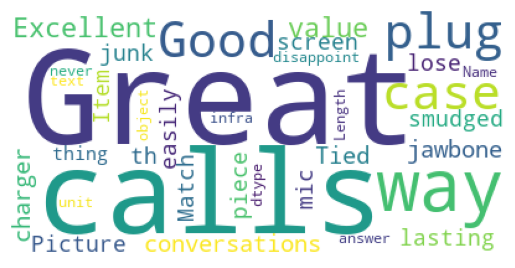

In [146]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use worldcloud to create world cloud visualization
# Note : The WordCloud function automatically  elimiate Stop word
wordcloud = WordCloud(background_color='white',max_words=50).generate(str(data.text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

As the result shows, we can see the most frequent word used in the text has the largest font size in wordcloud figure (except the word in Stop word).  
Stop word : https://en.wikipedia.org/wiki/Stop_word  

## 2. Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = data.text

vectorizer = TfidfVectorizer()
X_count_TF = vectorizer.fit_transform(corpus)

print(X_count_TF.shape)

(1000, 1847)


## 3. Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers.

In [148]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_ = CountVectorizer()
X_count_CV = vectorizer_.fit_transform(data.text) #learn the vocabulary and return document-term matrix
print(X_count_CV[0].shape)

(1, 1847)


In [149]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = train_test_split(X_count_TF, data.score, test_size=0.25)
X_train_CV, X_test_CV, Y_train_CV, Y_test_CV = train_test_split(X_count_CV, data.score, test_size=0.25)

bnb_TF = BernoulliNB(binarize=0.0)
bnb_TF.fit(X_train_TF, Y_train_TF)
print('Testing accuracy for TF-IDF feature: ',bnb_TF.score(X_test_TF, Y_test_TF))

bnb_CV = BernoulliNB(binarize=0.0)
bnb_CV.fit(X_train_CV, Y_train_CV)
print('Testing accuracy for frequency feature',bnb_CV.score(X_test_CV, Y_test_CV))

# Comment on the difference : 
# The TF-IDF feature has higher accuracy than the frequency feature
# Which means the TF-IDF process helps the Naive Bayes classifier to obtain better result


Testing accuracy for TF-IDF feature:  0.84
Testing accuracy for frequency feature 0.76


# Fourth Part : In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

The term frequency bar plot in section 5.5 contains too many redundant term like random numbers, I think this makes the visualization loose focus since the plot will be scaled  by the largest y axis value.  
By surffing through the data, I found out that majority of the numbers comes from spltting of internet address e.g. 140.114.64.1 will be splitted into 140, 114, 64, 1  
Hence by using python string split algorithm (default to split with separator '\s') to replace the default CountVectorizer split, the redundant number term will be gone.  
Also, I added stop word parameter, this will clean the english stop word.  

- Old term frequency bar plot

In [150]:
%reset -f

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

import pandas as pd
import helpers.data_mining_helpers as dmh
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df_test = pd.DataFrame({"text":count_vect.get_feature_names_out()[:300],"freq":term_frequencies[:300]})

df_sorted = df_test.sort_values(by='freq').iloc[::-1]
fig = px.bar(df_sorted,x='text'  ,y="freq")
fig.update_layout(xaxis_type='category')
fig.show()


- New term frequency bar plot

In [151]:
%reset -f

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

import pandas as pd
import helpers.data_mining_helpers as dmh
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words=stop, tokenizer=lambda x: x.split())
X_counts = count_vect.fit_transform(X.text)


import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df_test = pd.DataFrame({"text":count_vect.get_feature_names_out()[:300],"freq":term_frequencies[:300]})

df_sorted = df_test.sort_values(by='freq').iloc[::-1]
fig = px.bar(df_sorted,x='text'  ,y="freq")
fig.update_layout(xaxis_type='category')
fig.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NTHUEECL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


As the above figure shows, the term frequency is more clear compare with the original one since it only containes important words.